In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
import seaborn as sns

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

!pip install xgboost
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

In [6]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\God\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\God\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\God\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
df1 = pd.read_csv("Reviews.csv")
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
rating_mean = pd.DataFrame(df1.groupby('ProductId')['Score'].mean())

In [13]:
rating_mean = rating_mean.reset_index()
rating_mean

,ProductId,Score
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.751445
...,...,...
74253,B009UOFTUI,1.000000
74254,B009UOFU20,1.000000
74255,B009UUS05I,5.000000
74256,B009WSNWC4,5.000000


In [16]:
rating_mean = rating_mean.sort_values(by = 'Score',ascending=False)

In [17]:
rating_mean

,ProductId,Score
37129,B00214BO58,5.0
42070,B002PDYN44,5.0
42053,B002P9QAJE,5.0
42054,B002P9QRCO,5.0
42057,B002PA1KW0,5.0
...,...,...
46905,B003EMVVP4,1.0
65073,B005GSSI0U,1.0
46907,B003EMVXWK,1.0
46911,B003EMW37O,1.0


In [26]:
print("The products that have rated good are:")
print(rating_mean[rating_mean['Score']>=4].ProductId)

The products that have rated good are:
37129    B00214BO58
42070    B002PDYN44
42053    B002P9QAJE
42054    B002P9QRCO
42057    B002PA1KW0
            ...    
48156    B003LXRO48
13732    B000JMFCRA
40674    B002HFU7HC
13736    B000JMFCWA
40533    B002GWMCRY
Name: ProductId, Length: 54244, dtype: object


In [27]:
print("The products that have rated good are:")
print(rating_mean[rating_mean['Score']<4].ProductId)

The products that have rated good are:
65526    B005HUVI40
56316    B004DBT12A
56315    B004DBS2TI
44780    B0033GMSTY
45170    B00362FJD2
            ...    
46905    B003EMVVP4
65073    B005GSSI0U
46907    B003EMVXWK
46911    B003EMW37O
28949    B001EO601O
Name: ProductId, Length: 20014, dtype: object


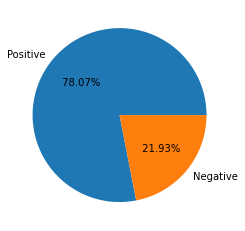

In [10]:
df1['Sentiment_Score'] = df1['Score'].map({1:0,2:0,3:0,4:1,5:1})
plt.pie(df1['Sentiment_Score'].value_counts(),autopct =' %0.2f%%',labels=['Positive','Negative'])
plt.show()

# Most of the reviews give are positive, It is a imbalanced dataset

In [11]:
#since it is a huge dataset, I am taking samples from it
df = df1.sample(50000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Score
459912,459913,B0006L0UAS,A2WC6GICPZWKTZ,Bambi,3,3,4,1292544000,picky chihuahua eater luv's um,wonderful treat!! nice and soft with a very na...,1
85107,85108,B003JO71D8,AR7YDHK0PT9VJ,Ms. Marie,0,1,5,1333843200,"AWSOME SERVICE, PRODUCT AND PRICE!!!","I can't believe how great service I got, I jus...",1
152639,152640,B001HXNIPS,A1LZJZIHUPLDV4,"vegancompassion ""anattanupassana""",16,18,5,1237852800,Vegan Natural Choice,Vegan. Natural. Traditional Swedish round kn&a...,1
266569,266570,B000LRIJVE,A24UJNVQH6FZY,eco bride,0,0,5,1328486400,"Tom Douglas loves it, and so should you!",Just FYI:<br />Real Simple Magazine rated Part...,1
552951,552952,B000EQYS7Q,ACAIEIV03NBHY,"J ""Mom of twins""",3,3,4,1180051200,"The ""salt and pepper"" chips bite back!","These are really good, but whoa! there's no mi...",1
...,...,...,...,...,...,...,...,...,...,...,...
458676,458677,B000FFIL92,APOXXKB1JR51X,Suzanna Otting,10,10,4,1168387200,"Great value, fragile teapot","At Amazon's price, this is a good value for th...",1
230252,230253,B00004RYGX,A3R2YB0WTTB0IJ,"Daniel S. ""Daniel""",0,0,4,1055808000,ONE OF THE FIRST MOVIES OF AN AUTHENTIC ARTIST,Tim Burton is a guy Hollywood should honor eve...,1
396873,396874,B0006BHPE2,AV4KI0QXERDVO,"Angelica Dimeo ""serenity20""",3,4,5,1231200000,my review,this made a great gift<br />and i got to try a...,1
190055,190056,B0000DGG1U,A3HSKVJHGWR0M0,Codi,0,0,5,1330473600,Truly Great for Any Price!,I got the plant quickly and it arrived in amaz...,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 459912 to 535407
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   ProfileName             49998 non-null  object
 4   HelpfulnessNumerator    50000 non-null  int64 
 5   HelpfulnessDenominator  50000 non-null  int64 
 6   Score                   50000 non-null  int64 
 7   Time                    50000 non-null  int64 
 8   Summary                 49999 non-null  object
 9   Text                    50000 non-null  object
 10  Sentiment_Score         50000 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.6+ MB


# sentiment analysis

In [13]:
data = df[['Score','Text']]
data

,Score,Text
459912,4,wonderful treat!! nice and soft with a very na...
85107,5,"I can't believe how great service I got, I jus..."
152639,5,Vegan. Natural. Traditional Swedish round kn&a...
266569,5,Just FYI:<br />Real Simple Magazine rated Part...
552951,4,"These are really good, but whoa! there's no mi..."
...,...,...
458676,4,"At Amazon's price, this is a good value for th..."
230252,4,Tim Burton is a guy Hollywood should honor eve...
396873,5,this made a great gift<br />and i got to try a...
190055,5,I got the plant quickly and it arrived in amaz...


In [14]:
data.isnull().sum()

Score    0
Text     0
dtype: int64

In [15]:
data['Score'].value_counts()

5    32128
4     7112
1     4556
3     3668
2     2536
Name: Score, dtype: int64

In [16]:
data['Sentiment_Score'] = data['Score'].map({1:0,2:0,3:0,4:1,5:1})

C:\Users\God\AppData\Local\Temp/ipykernel_3168/3962566748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_Score'] = data['Score'].map({1:0,2:0,3:0,4:1,5:1})


In [17]:
data.head()

,Score,Text,Sentiment_Score
459912,4,wonderful treat!! nice and soft with a very na...,1
85107,5,"I can't believe how great service I got, I jus...",1
152639,5,Vegan. Natural. Traditional Swedish round kn&a...,1
266569,5,Just FYI:<br />Real Simple Magazine rated Part...,1
552951,4,"These are really good, but whoa! there's no mi...",1


In [18]:
data['Sentiment'] = data['Sentiment_Score'].map({1:'Positive',0:'Negative'})
data.head()

C:\Users\God\AppData\Local\Temp/ipykernel_3168/3831954578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment_Score'].map({1:'Positive',0:'Negative'})


,Score,Text,Sentiment_Score,Sentiment
459912,4,wonderful treat!! nice and soft with a very na...,1,Positive
85107,5,"I can't believe how great service I got, I jus...",1,Positive
152639,5,Vegan. Natural. Traditional Swedish round kn&a...,1,Positive
266569,5,Just FYI:<br />Real Simple Magazine rated Part...,1,Positive
552951,4,"These are really good, but whoa! there's no mi...",1,Positive


# Collecting all words

In [19]:
words = pd.Series(''.join(data['Text']).split())


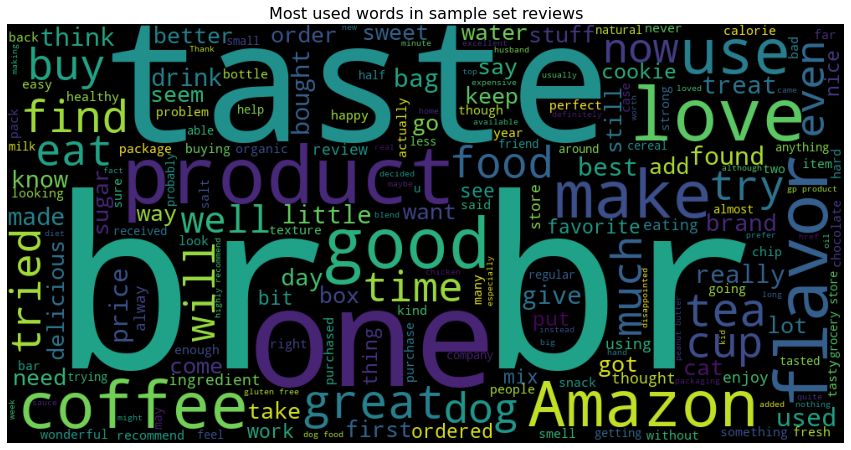

In [20]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in sample set reviews", size=16)

plt.axis("off")
plt.show()

In [21]:
positiveWords = pd.Series(' '.join(data[data['Sentiment']=='Positive']['Text']).split())

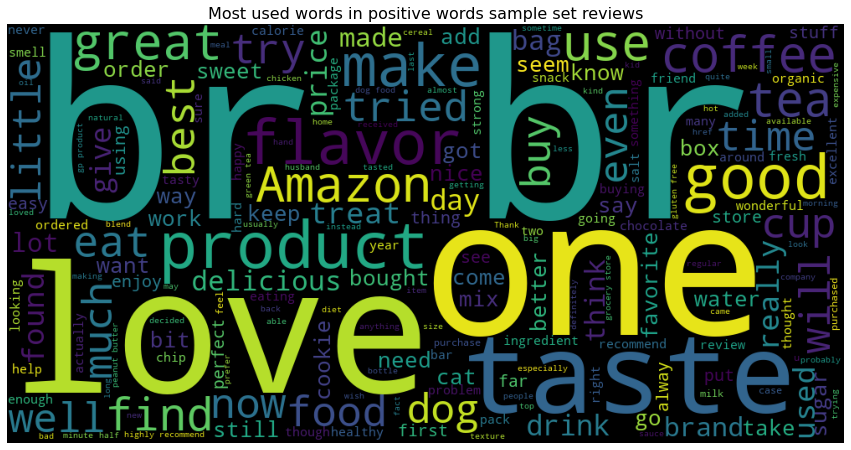

In [22]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive words sample set reviews", size=16)

plt.axis("off")
plt.show()

In [23]:
negative_words = pd.Series(' '.join(data[data['Sentiment']=='Negative']['Text']).split())

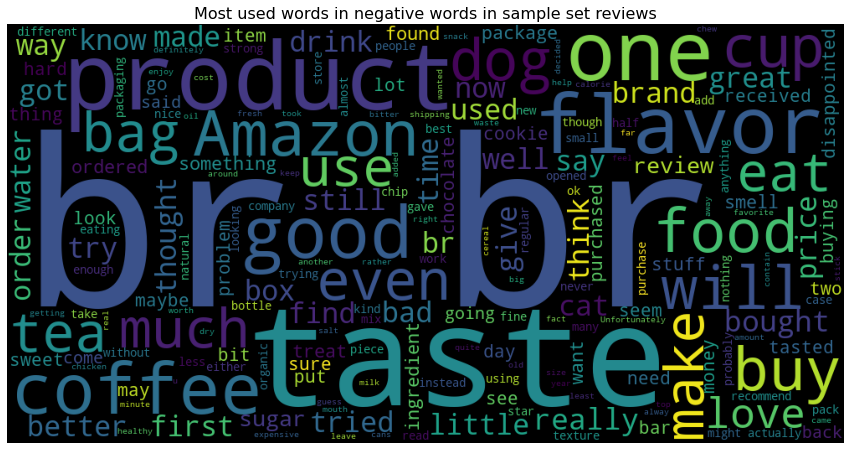

In [24]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative words in sample set reviews", size=16)

plt.axis("off")
plt.show()

# Functions for Cleaning words

In [25]:
def clean_text(text):
    
    text = str(text)
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+',' ',text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text
    
    

In [26]:
def stopwords(text):
    
    stopword = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]
    token = word_tokenize(text)
    filtered_text=[]
    for w in token:
        if w not in stopword:
            filtered_text.append(w)
    text = " ".join(filtered_text)
    
    return text
    

In [27]:
def pos_tag_wordnet(text):
    
    if text.startswith('J'):
        return wordnet.ADJ
    elif text.startswith('N'):
        return wordnet.NOUN
    elif text.startswith('v'):
        return wordnet.VERB
    elif text.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

In [28]:
def lemmatize(text):
    text = str(text)
    lemm = WordNetLemmatizer()
    
    token = word_tokenize(text)
    
    word_pos = nltk.pos_tag(token)
    lemmenatized_text = []
    
    for index,tag in enumerate(word_pos):
        lemmenatized_text.append(lemm.lemmatize(tag[0],pos_tag_wordnet(tag[1])))
    text = " ".join(lemmenatized_text)
    
    return text

# Cleaning text and Preprocessing of Text

In [29]:
data['Processed_Text'] = data['Text'].apply(clean_text)

C:\Users\God\AppData\Local\Temp/ipykernel_3168/881555694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Processed_Text'] = data['Text'].apply(clean_text)


In [30]:
data['Processed_Text'] = data['Processed_Text'].apply(lambda x:stopwords(x))

C:\Users\God\AppData\Local\Temp/ipykernel_3168/2154447287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Processed_Text'] = data['Processed_Text'].apply(lambda x:stopwords(x))


In [31]:
data['Processed_Text'] = data['Processed_Text'].apply(lemmatize)

C:\Users\God\AppData\Local\Temp/ipykernel_3168/3355427870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Processed_Text'] = data['Processed_Text'].apply(lemmatize)


In [ ]:
data.to_csv("Processed_text.csv")

In [61]:
data1 = pd.read_csv('Processed_text.csv')
data1

,Unnamed: 0,Score,Text,Sentiment_Score,Sentiment,Processed_Text
0,420434,5,We love peanut butter and chocolate combinatio...,1,Positive,we love peanut butter chocolate combination ki...
1,458649,3,"While this is a lovely thoughtful gift, don't ...",0,Negative,while lovely thoughtful gift don t expect hand...
2,323546,5,Excellent taste and a great weight loss boost....,1,Positive,excellent taste great weight loss boost benefi...
3,107240,4,"With having limited pasta choices due to corn,...",1,Positive,with having limited pasta choice due corn egg ...
4,248752,5,We have older dogs and one lost her front toot...,1,Positive,we have old dog one lost her front tooth recen...
...,...,...,...,...,...,...
49995,269616,5,The oil is very nice - quite neutral-tasting. ...,1,Positive,oil very nice quite neutral tasting i like s s...
49996,228787,5,"I'm addicted to salty and tangy flavors, so wh...",1,Positive,i m addicted salty tangy flavor so when i open...
49997,59568,5,These bars are really good. Kind of like fruit...,1,Positive,these bar are really good kind of like fruit r...
49998,279919,5,I was recently in Las Vegas for a trade show. ...,1,Positive,i wa recently in la vega for trade show after ...


In [34]:
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data1['Processed_Text'])
features = vectorizer.transform(data1['Processed_Text'])

features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08906695, 0.        , ..., 0.38301258, 0.09617941,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08901412, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06866936, 0.        , ..., 0.09843243, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
word_matrix = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
word_matrix.head()

,able,about,absolutely,actually,add,added,adding,after,aftertaste,again,...,worth,would,wouldn,wrong,year,yes,yet,you,your,yummy
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.089067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.15007,0.0,0.104339,0.0,0.0,0.383013,0.096179,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.089014,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(word_matrix, data1['Sentiment_Score'], test_size=0.2, random_state=42)

print (f'Train set shape : {x_train.shape}\nTest set shape : {x_test.shape}')


Train set shape : (40000, 700)
Test set shape : (10000, 700)


In [39]:
Y = pd.DataFrame(y_train)
train_data = pd.concat([x_train, Y],axis=1)
train_data.head()

,able,about,absolutely,actually,add,added,adding,after,aftertaste,again,...,would,wouldn,wrong,year,yes,yet,you,your,yummy,Sentiment_Score
39087,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
30893,0.0,0.084474,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.079936,0.0,0.0,0.0,0.0,0.0,0.060544,0.091220,0.0,0
45278,0.0,0.000000,0.0,0.098756,0.0,0.0,0.0,0.077798,0.0,0.0,...,0.066461,0.0,0.0,0.0,0.0,0.0,0.000000,0.075843,0.0,1
16398,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0
13653,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.139166,0.0,0.0,0.0,0.0,0.0,0.105405,0.000000,0.0,1


In [40]:
target_count = train_data['Sentiment_Score'].value_counts()
negative_class = train_data[train_data['Sentiment_Score'] == 0]
positive_class = train_data[train_data['Sentiment_Score'] == 1]
# sampling -ve values to make balanced dataset


In [41]:
negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = df_train_over.sample(frac=1)
df_train_over.head()


,able,about,absolutely,actually,add,added,adding,after,aftertaste,again,...,would,wouldn,wrong,year,yes,yet,you,your,yummy,Sentiment_Score
2078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0
38090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.087138,0.0,0.0,0.053312,0.080323,0.0,1
20932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.077998,0.000000,0.0,0
39516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.130516,0.000000,0.0,1
23948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178285,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0


In [42]:
df_train_over.dropna(inplace=True)

In [43]:
df_train_over['Sentiment_Score'].value_counts()

0    31260
1    31260
Name: Sentiment_Score, dtype: int64

# Dataset is balanced

In [44]:
X_train = df_train_over.iloc[:,:-1]
Y_train = df_train_over['Sentiment_Score']

In [45]:
def ML_algo(Model, x, y):
    
    mini = Model
    mini.fit(x, y)
    
    global y_pred
    y_pred = mini.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], 
                                   colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

# Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.53      0.80      0.64      2241
           1       0.93      0.80      0.86      7759

    accuracy                           0.80     10000
   macro avg       0.73      0.80      0.75     10000
weighted avg       0.84      0.80      0.81     10000

AUC  0.795738466460535


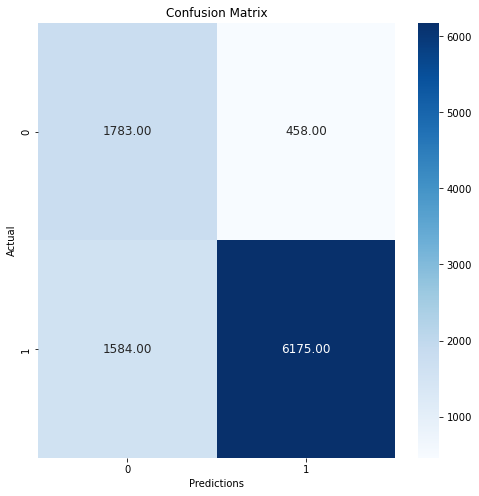

In [46]:
ML_algo(MultinomialNB(), X_train,  Y_train)

In [47]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

# XG Boost Classifier

              precision    recall  f1-score   support

           0       0.61      0.75      0.67      2241
           1       0.92      0.86      0.89      7759

    accuracy                           0.83     10000
   macro avg       0.76      0.81      0.78     10000
weighted avg       0.85      0.83      0.84     10000

AUC  0.8059850635375055


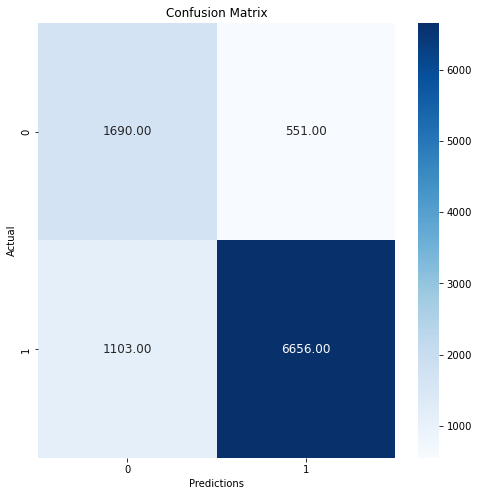

In [48]:
ML_algo(XGBClassifier(), X_train,  Y_train)

In [49]:
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [65]:
data1 = data1.rename(columns = {'Unnamed: 0':'ID'})

In [67]:
sentiment = pd.DataFrame()

In [72]:
sentiment['Actual Sentiment'] = y_test.map({0:'Negative',1:'Positive'})

In [76]:
sentiment['Predicted Sentiment'] = y_pred

In [80]:
sentiment['Predicted Sentiment'] = sentiment['Predicted Sentiment'].map({0:'Negative',1:'Positive'})

In [85]:
sentiment = sentiment.reset_index()

In [86]:
sentiment = sentiment.rename(columns={'index':'ID'})

In [87]:
sentiment

,ID,Actual Sentiment,Predicted Sentiment
0,33553,Positive,Positive
1,9427,Negative,Positive
2,199,Negative,Negative
3,12447,Positive,Positive
4,39489,Positive,Positive
...,...,...,...
9995,28567,Positive,Positive
9996,25079,Positive,Positive
9997,18707,Positive,Negative
9998,15200,Positive,Positive
